<a href="https://colab.research.google.com/github/Luke-Coffman/IS-4487/blob/main/Labs/Scripts/lab8_megatelco_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 8

## Outline

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab8_megatelco_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco_leave_survey.csv data

**Note:** you will need to enter a code supplied by Google in the next step.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/megatelco_leave_survey (2).csv')

Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

In [5]:
#describe the data before cleaning it
df.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,4997.000000,5000.000000,5000.000000
mean,79912.948400,85.119200,24.243600,493656.326600,7.876236e+02,7.744647,5.958800,10036.639400
std,41703.042384,85.655622,26.847496,254287.193865,2.828291e+04,8.806070,4.390417,5813.620304
min,-28811.000000,0.000000,0.000000,-796132.000000,1.300000e+02,0.000000,1.000000,2.000000
25%,41592.500000,0.000000,0.000000,260586.500000,2.190000e+02,1.000000,2.000000,4950.500000
50%,75041.500000,59.000000,15.000000,451865.500000,3.220000e+02,4.000000,5.000000,10126.000000
75%,115475.000000,177.000000,42.000000,701608.750000,5.280000e+02,14.000000,9.000000,15085.250000
max,159938.000000,335.000000,89.000000,1000000.000000,2.000234e+06,29.000000,15.000000,20000.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [6]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [7]:
#Get distinct values
df_clean['college'].unique()

array(['one', 'zero'], dtype=object)

In [8]:
df_clean['reported_satisfaction'] .unique()

array(['low', 'high', 'avg'], dtype=object)

In [9]:
df_clean['reported_usage_level'].unique()

array(['low', 'high', 'avg'], dtype=object)

In [10]:
df_clean['considering_change_of_plan'].unique()

array(['yes', 'no', 'maybe'], dtype=object)

In [11]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean['college'] = df_clean['college'].astype('int')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('int')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('int')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('float')

df_clean.head(10)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,1,23859,70,0,519105,154,5.0,8,1,1,1.0,LEAVE,8183
1,0,72466,67,16,271182,262,5.0,5,1,1,1.0,LEAVE,12501
2,0,30883,60,0,647281,211,3.0,8,1,1,1.0,STAY,7425
3,1,44512,0,22,754958,232,0.0,5,1,1,0.0,LEAVE,13488
4,0,70535,0,0,653421,310,0.0,14,1,1,1.0,STAY,11389
5,0,143987,0,56,896544,778,5.0,1,1,3,1.0,STAY,14674
6,1,96668,79,24,259329,365,5.0,6,1,2,1.0,LEAVE,19100
7,1,50083,0,0,160335,266,5.0,10,1,3,1.0,STAY,18170
8,1,104392,0,0,247836,778,1.0,8,3,1,0.0,LEAVE,3201
9,1,37852,0,74,264893,857,0.0,2,1,1,1.0,LEAVE,12612


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [14]:
#Method #1
df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
 13  lea

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [13]:
#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()


0.4941930316379656

## Prepare Data

➡️ Assignment Tasks
- Create a new variable called "Income_Level".   Use the income variable to put customers in to groups from $0-$100K, $101-200K, etc.
 Create a new variable called "Satisfaction_Level".  Use the reported_satisfaction variable to put customers into groups of High, Medium, Low.  Make this a categorical variable.  

In [15]:
#income level
df_clean['Income_Level'] = pd.cut(df_clean['income'],
                                  bins=[0, 100000, 200000, np.inf],
                                  labels=['0-100K', '101-200K', '>200K'],
                                  right=False)



In [16]:
#satisfaction level
satisfaction_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}
df_clean['Satisfaction_Level'] = df_clean['reported_satisfaction'].map(satisfaction_mapping).astype('category')

# Check the changes
df_clean[['income', 'Income_Level', 'reported_satisfaction', 'Satisfaction_Level']].head()

,income,Income_Level,reported_satisfaction,Satisfaction_Level
0,23859,0-100K,1,Low
1,72466,0-100K,1,Low
2,30883,0-100K,1,Low
3,44512,0-100K,1,Low
4,70535,0-100K,1,Low


## Visualize Relationships

➡️ Assignment Tasks
- Create a bar chart, histogram, or scatter for at least three variables, showing their relationship with the target variable

<Figure size 1000x600 with 0 Axes>

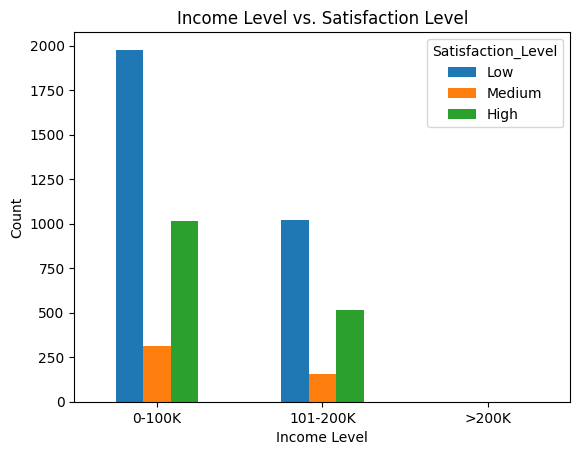

In [20]:
#chart 1
import matplotlib.pyplot as plt

# Bar chart for Income Level vs. Satisfaction Level
income_satisfaction_counts = df_clean.groupby(['Income_Level', 'Satisfaction_Level']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
income_satisfaction_counts.plot(kind='bar', rot=0)
plt.title('Income Level vs. Satisfaction Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()


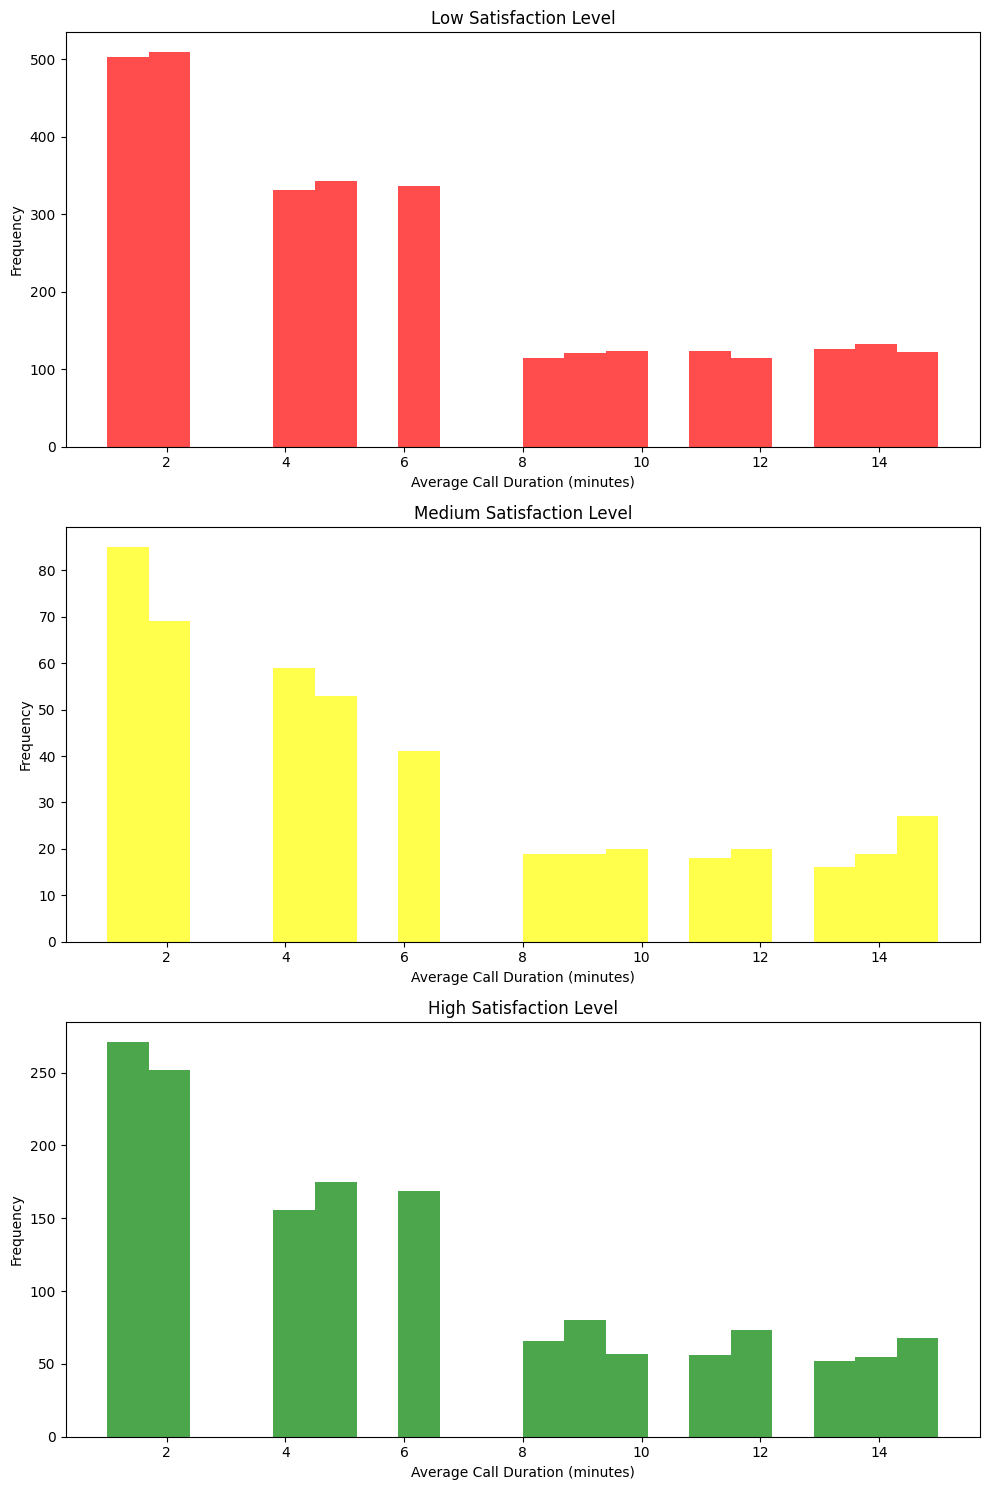

In [28]:
#chart 2
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i, satisfaction in enumerate(['Low', 'Medium', 'High']):
    subset = df_clean[df_clean['Satisfaction_Level'] == satisfaction]['average_call_duration']
    ax[i].hist(subset, bins=20, color=colors[i], alpha=0.7)
    ax[i].set_title(f'{satisfaction} Satisfaction Level')
    # Explicitly setting x-axis label for each subplot
    ax[i].set_xlabel('Average Call Duration (minutes)')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

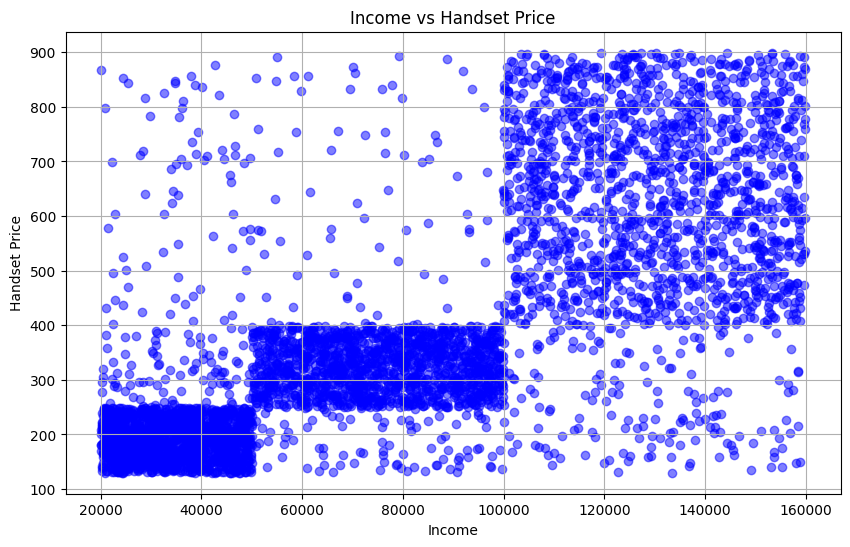

In [29]:
#chart 3
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['income'], df_clean['handset_price'], alpha=0.5, c='blue')
plt.title('Income vs Handset Price')
plt.xlabel('Income')
plt.ylabel('Handset Price')
plt.grid(True)
plt.show()